In [42]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
ds = pd.read_csv("C:/Users/riddh/OneDrive/Documents/Edwisor/Project 1/day.csv", sep = ",")
dsPredictors = ds.iloc[:,3:16]
dsPredictors.rename(columns = {'yr' : 'year',
                      'mnth' : 'month', 'weathersit' : 'weatherSituation',
                      'cnt' : 'count', 'hum' : 'humidity'}, inplace = True)

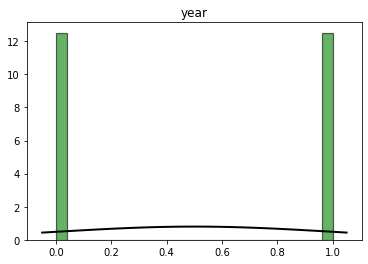

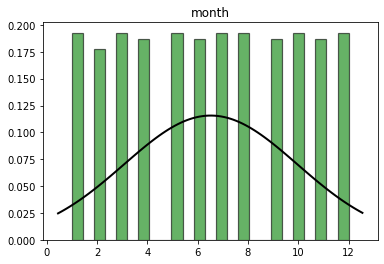

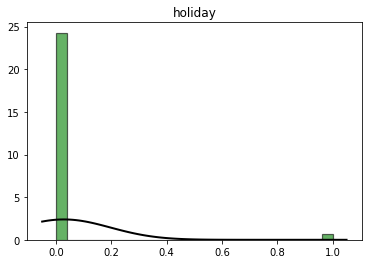

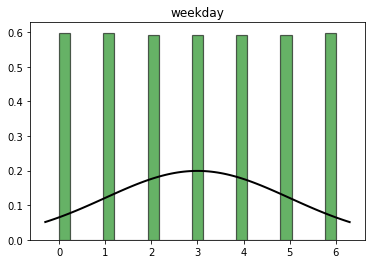

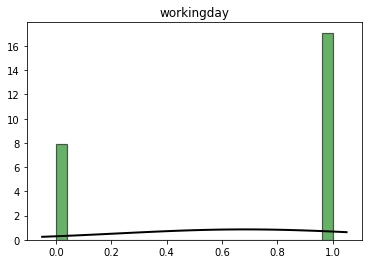

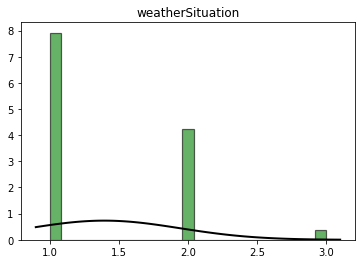

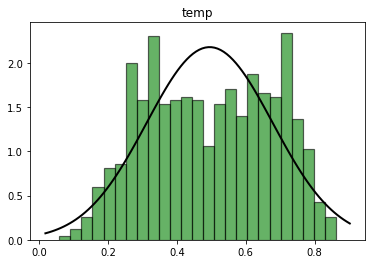

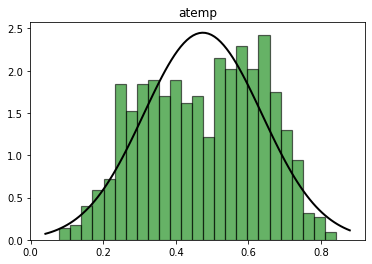

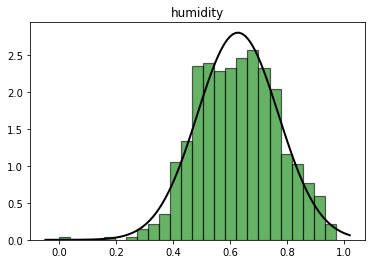

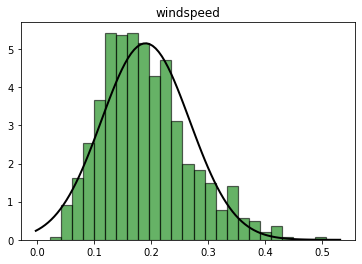

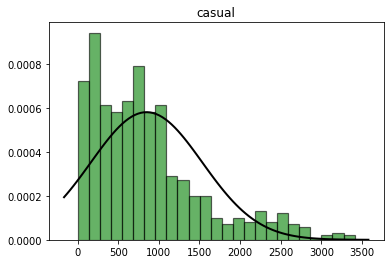

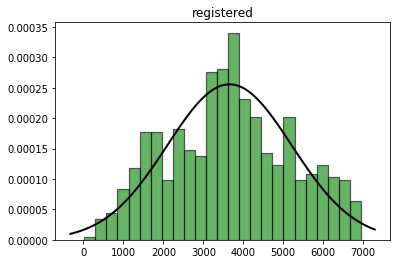

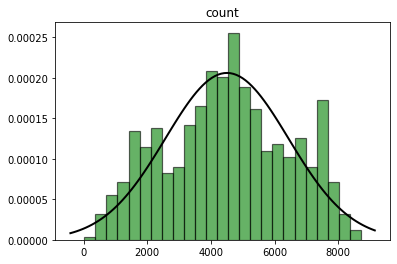

In [44]:

#histograms with normal curve
for i in range(len(dsPredictors.columns)):
    mu, std = norm.fit(dsPredictors.iloc[:,i])

    # Plot the histogram.
    plt.hist(dsPredictors.iloc[:,i], bins=25, density=True, alpha=0.6, color='g',edgecolor='black', linewidth=1.2)

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = dsPredictors.columns[i]
    plt.title(title)

    plt.show()

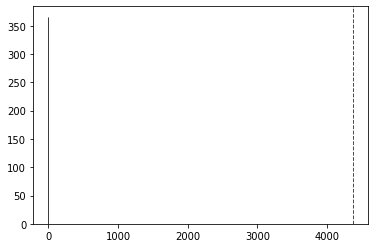

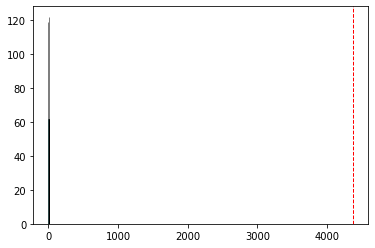

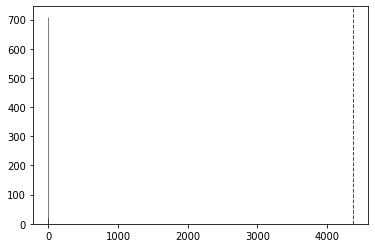

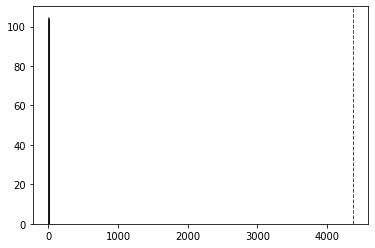

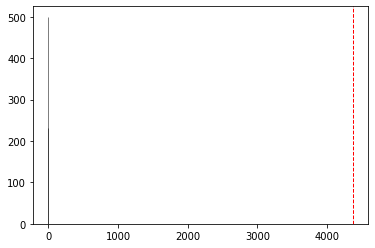

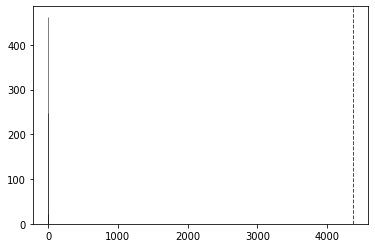

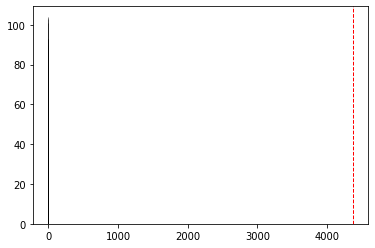

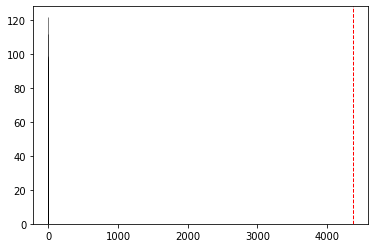

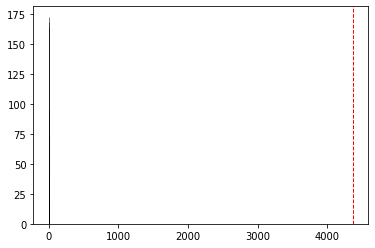

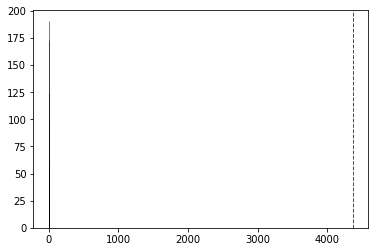

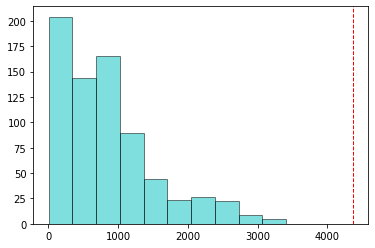

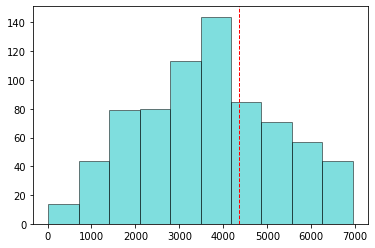

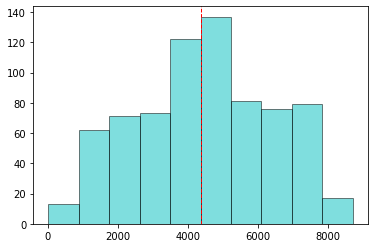

In [45]:
#histogram with mean line
for i in range(len(dsPredictors.columns)):
    result = plt.hist(dsPredictors.iloc[:,i], bins=10, color='c', edgecolor='k', alpha=0.5)
    plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=1)
    plt.show()

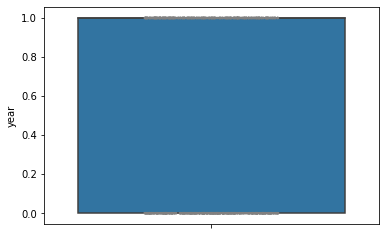

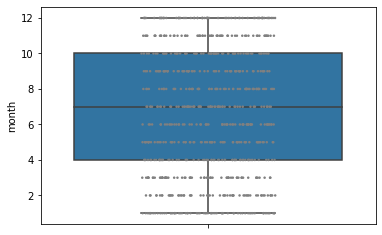

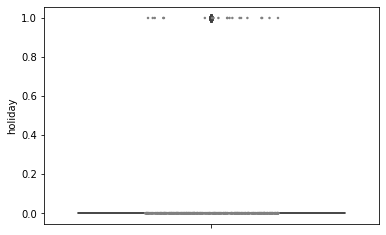

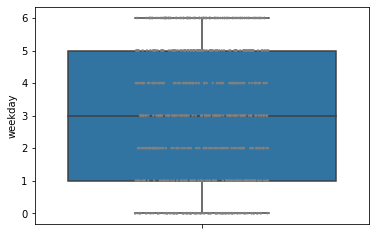

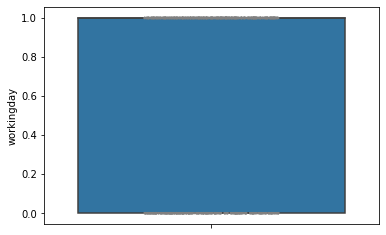

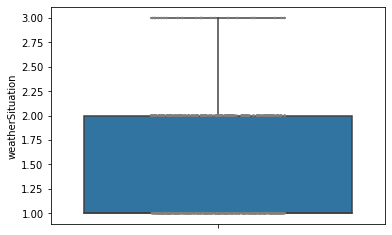

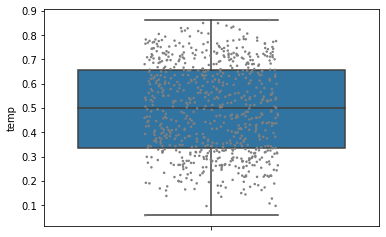

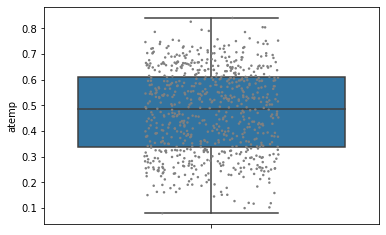

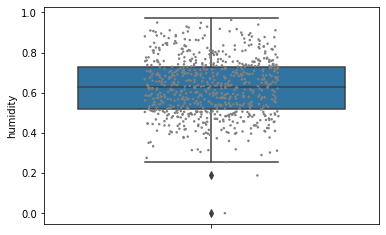

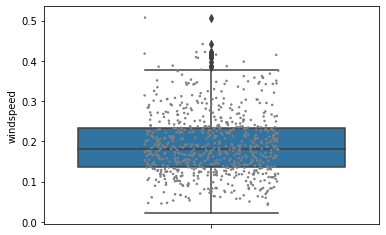

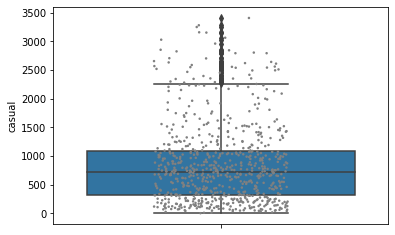

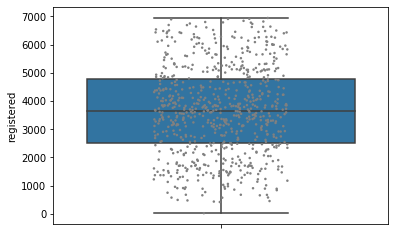

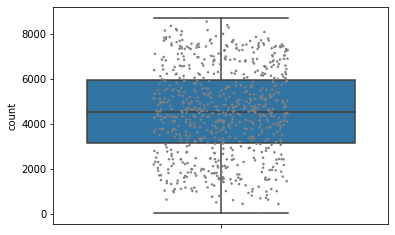

In [46]:
#boxplot with outliers
for i in range(len(dsPredictors.columns)):
    ax = sns.boxplot(y=dsPredictors.iloc[:,i], data=dsPredictors) 
    # Add jitter with the swarmplot function.
    ax = sns.stripplot(y=dsPredictors.iloc[:,i], data=dsPredictors, color="grey", jitter=0.2, size=2.5)
    plt.show()

In [47]:
col_withOutliers = ['windspeed', 'humidity']
ds_withoutOutliers = dsPredictors
for i in col_withOutliers:
    print(i)
    q75, q25 = np.percentile(dsPredictors.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    #if ((dsPredictors.loc[:,i] < min).values):
    print([dsPredictors.loc[:,i] < min].index)
  
    ds_withoutOutliers = ds_withoutOutliers.drop(ds_withoutOutliers[ds_withoutOutliers.loc[:,i] < min].index)
    ds_withoutOutliers = ds_withoutOutliers.drop(ds_withoutOutliers[ds_withoutOutliers.loc[:,i] > max].index)
    print(ds_withoutOutliers)

windspeed
-0.012446750000000034
0.38061125
<built-in method index of list object at 0x00000164A32B4548>
     year  month  holiday  weekday  workingday  weatherSituation      temp  \
0       0      1        0        6           0                 2  0.344167   
1       0      1        0        0           0                 2  0.363478   
2       0      1        0        1           1                 1  0.196364   
3       0      1        0        2           1                 1  0.200000   
4       0      1        0        3           1                 1  0.226957   
..    ...    ...      ...      ...         ...               ...       ...   
726     1     12        0        4           1                 2  0.254167   
727     1     12        0        5           1                 2  0.253333   
728     1     12        0        6           0                 2  0.253333   
729     1     12        0        0           0                 1  0.255833   
730     1     12        0        1    

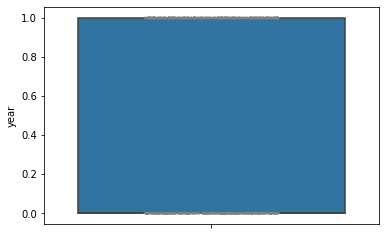

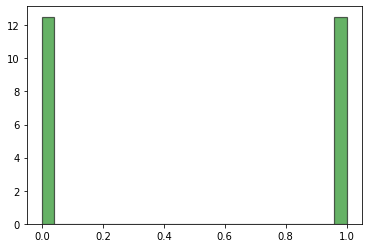

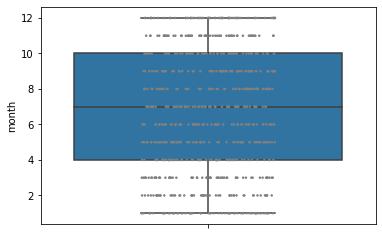

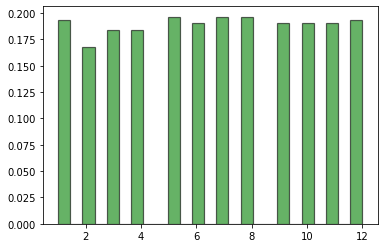

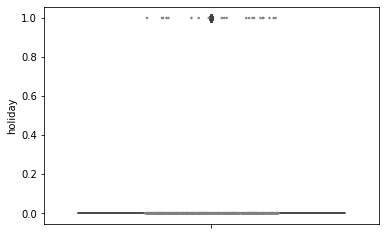

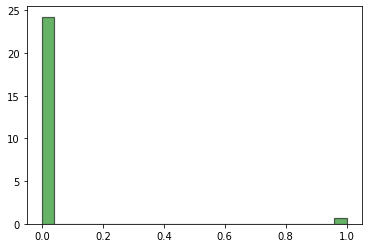

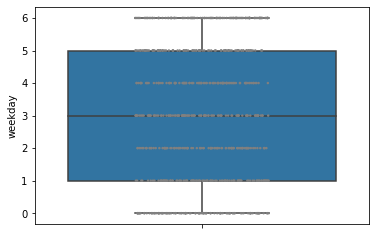

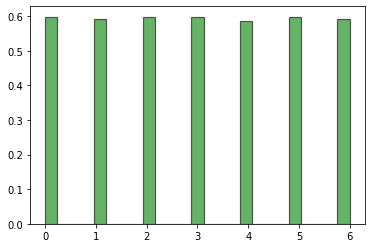

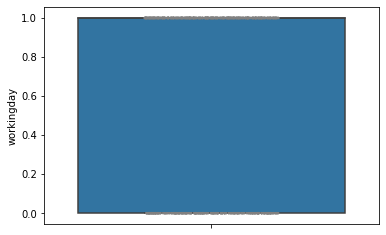

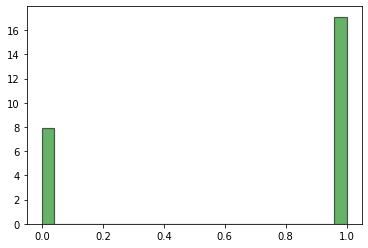

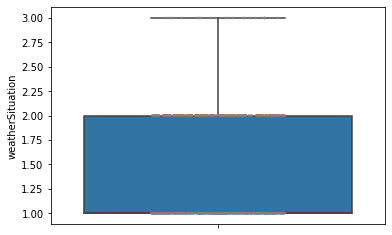

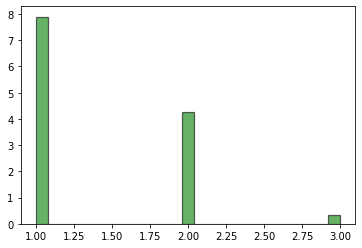

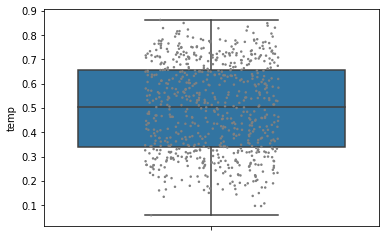

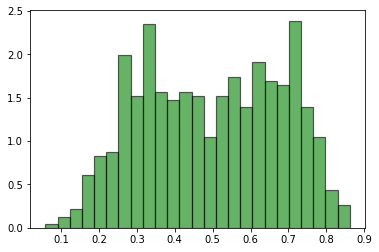

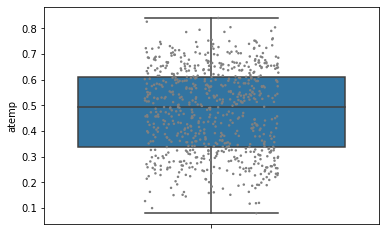

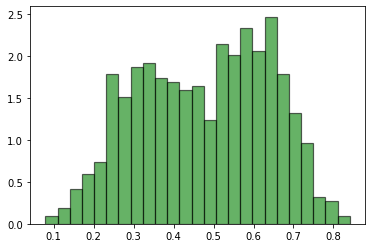

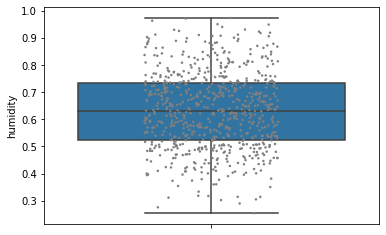

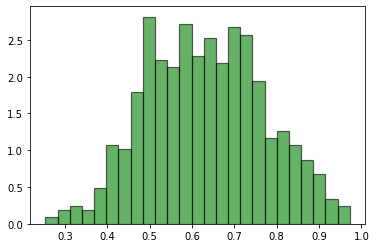

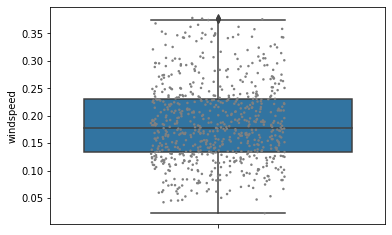

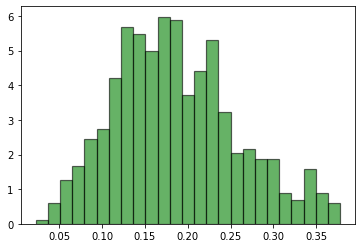

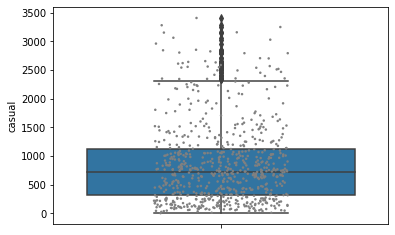

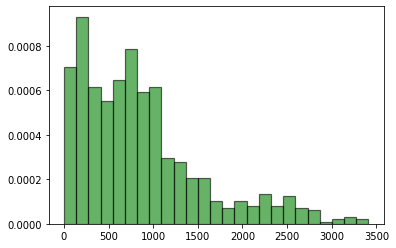

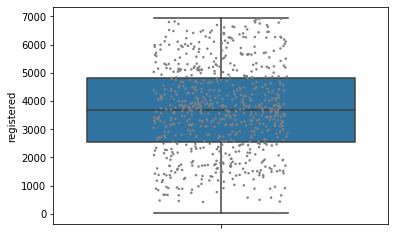

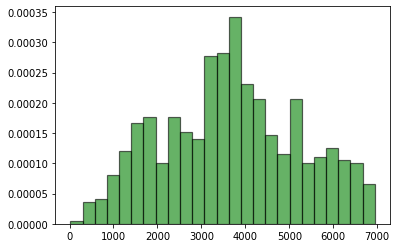

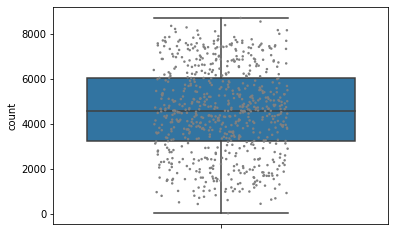

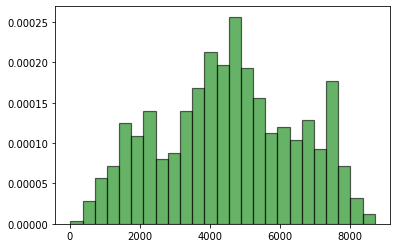

In [48]:
#graph without outliers
for i in range(len(ds_withoutOutliers.columns)):
    ax = sns.boxplot(y=ds_withoutOutliers.iloc[:,i], data=ds_withoutOutliers) 
    # Add jitter with the swarmplot function.
    ax = sns.stripplot(y=ds_withoutOutliers.iloc[:,i], data=ds_withoutOutliers, color="grey", jitter=0.2, size=2.5)
    plt.show()
    plt.hist(ds_withoutOutliers.iloc[:,i], bins=25, density=True, alpha=0.6, color='g',edgecolor='black', linewidth=1.2)
    plt.show()


In [49]:
#